In [2]:
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)



crime_data = pd.read_csv("MontgomeryCountyCrime2013.csv")

d_time = pd.to_datetime(crime_data["Dispatch Date / Time"]) #Importing specified column
week = d_time.dt.weekday_name.value_counts(sort = True) #Counting week days crimes
month = d_time.dt.month.value_counts(sort = False) #Counting months crimes
day = d_time.dt.day.value_counts(sort = False) #Counting the days
hour = d_time.dt.hour.value_counts(sort = True) #Counting hours
matplotlib.rcParams.update({'font.size': 22}) #Change font size (bigger)





In [9]:
crimes.head()

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN


# Month and Week Analyze

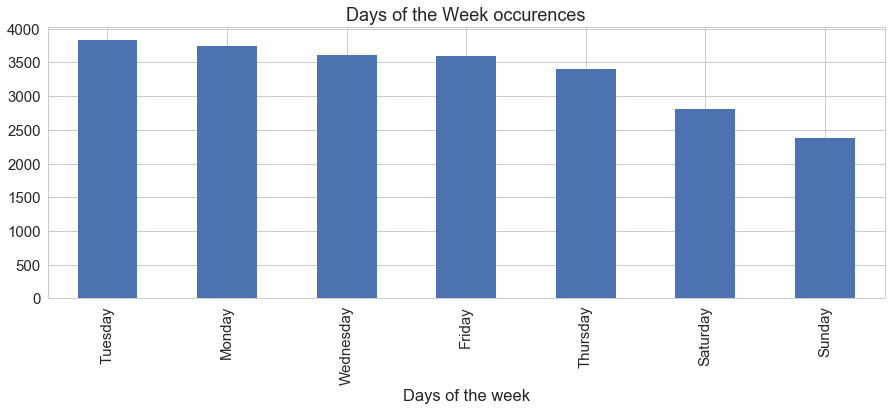

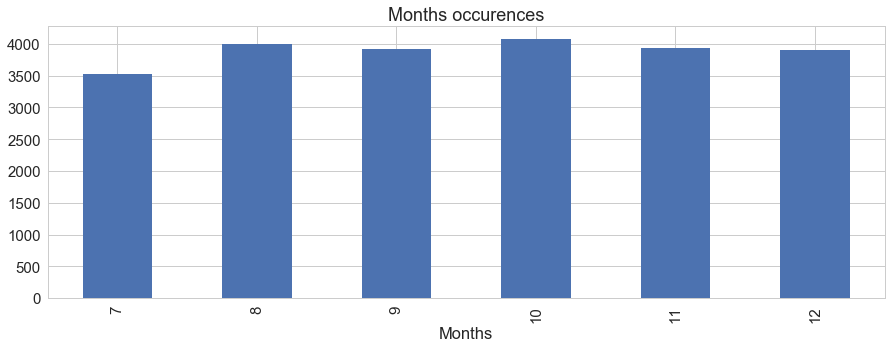

In [3]:
#Plotting week days bar
fig = plt.figure(figsize=(15,5)) #making figure bigger
weekplot = week.plot.bar()
weekplot.set_xlabel("Days of the week")
weekplot.set_title("Days of the Week occurences")
plt.show()

#Plotting months bargraph
fig = plt.figure(figsize=(15,5)) #Making figure bigger
monthplot = month.plot.bar()
monthplot.set_xlabel("Months")
monthplot.set_title("Months occurences")
plt.show()


#day.plot.bar()

# Plotting Dispatched Time

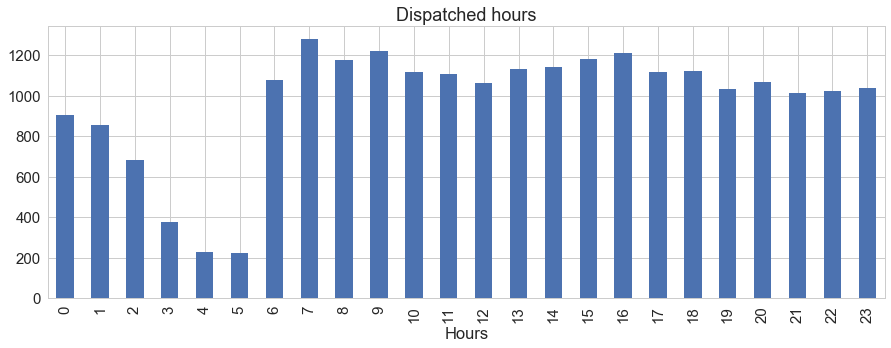

In [4]:
hour = d_time.dt.hour.value_counts(sort = True)
#print(hour)
hour.sort_index(axis=0, ascending=True,inplace=True)

#Plotting day hours bargraph
plt.figure(figsize=(15,5));
#histplot = d_time.dt.hour.plot.hist(stacked=False, bins=24)
histplot = hour.plot.bar()
histplot.set_xlabel("Hours")
histplot.set_title("Dispatched hours")
plt.show()
fig = histplot.get_figure()
#fig.savefig("total-sales.png")


# Plotting Start Date / Time

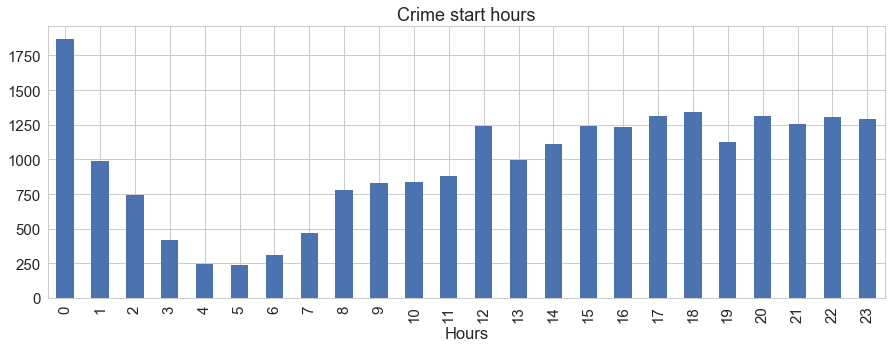

In [5]:
crime_start = pd.to_datetime(crime_data["Start Date / Time"]) #Importing Start Date / Time Column
hour_start = crime_start.dt.hour.value_counts(sort = False) #Counting day hours
hour_start.sort_index(axis=0, ascending=True,inplace=True)

#Plotting  Crime Start hours bargraph
plt.figure(figsize=(15,5));
#histplot = d_time.dt.hour.plot.hist(stacked=False, bins=24)
histplot = hour_start.plot.bar()
histplot.set_xlabel("Hours")
histplot.set_title("Crime start hours")
plt.show()
fig = histplot.get_figure()
#fig.savefig("total-sales.png")

# 1. Time Analyzis
## 1.1 Comparison "Dispatch Date / Time" and Start/End Time
   Dispatached Date / Time means the time when a Police Office has been dispatched to the site whereas the Start/End Time mean the times when the crime occorred from and to, respectively.
   
   According to the Dispatched plot, it is possible to see that the peak of frequency that a Police Office has been dispatched to site where the crime occured is from 7 am to 8 am, probably meanning when the shift timetable starts. On the other hand, when seeing the Crime Start Hour plot, it is possible to analize that most of crimes occur from 0 am to 1 am with a number of over 1750 occurences. At the same period of time in Dispatched plot, we have got a number of 900 occurences, concluding that 850 crimes occured and no police office was despatched in that period.
   
   The minimum number of occurences if found from 4 am to 5 am in both plots
   
## 1.2 Month
   According to Month's analyzis we can see that the Montgomery dataset started in July and its crimes' occurrences reached the number of 3500 situations. The following months, from august to dezember, the crimes occurences remained steady around 4000 situations.

## 1.3 Day of week
   The week analysis tells us which day of week has occurred the most of crimes. Surprisingly the weekend period has less crimes then the week period. Sunday is the day when the crimes less occurs. It is roughly 40% lesser than the highest values found  in Tuesday with the number of 3800 occurences.

# Plotting Crime Locations

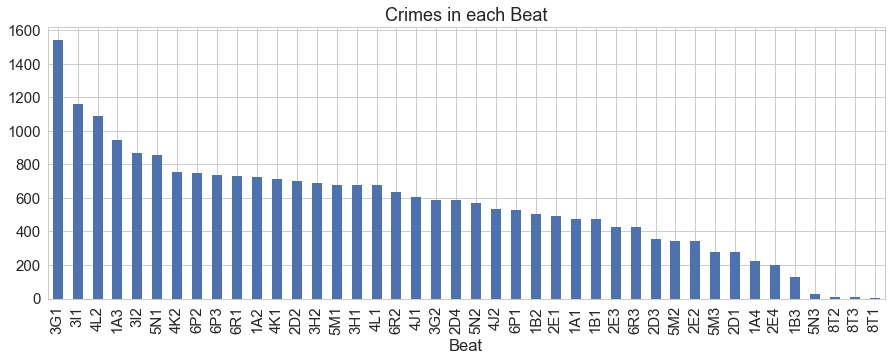

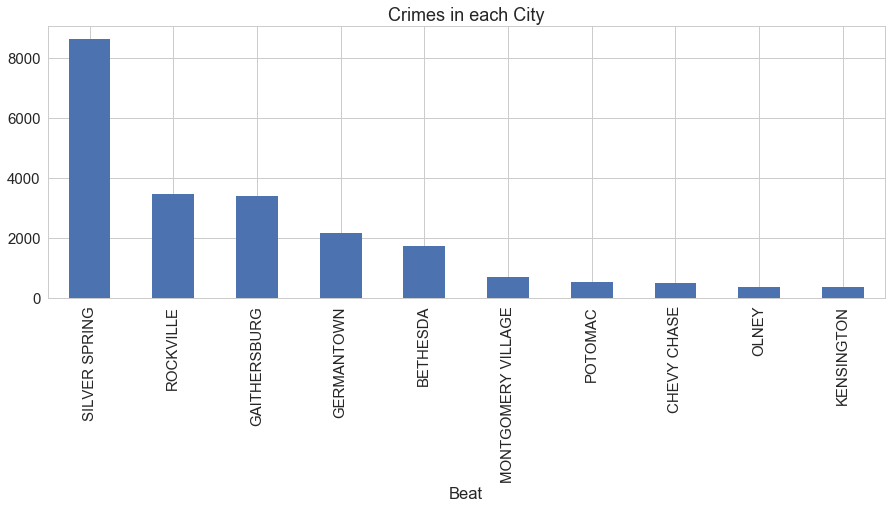

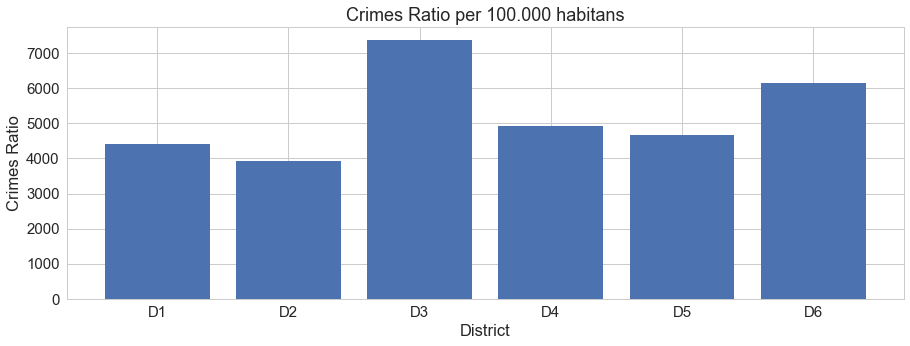

In [7]:
beat = crime_data["Beat"] #Receiving Beat values
city = crime_data["City"] #Receiving city values
beat_values = beat.value_counts(sort = True) #Sorting beat descending values 
city_values = city.value_counts() #Sorting city descending values
#print(beat_values)

#Crimes rates per capita
#1D - 4406.6/100.000
#2D - 3919.4/100.000
#3D - 7374,9/100.000
#4D - 4909,2/100.000
#5D - 4669,3/100.000
#6D - 6138,9/100.000

D1 = 4406.6
D2 = 3919.4
D3 = 7374.9
D4 = 4909.2
D5 = 4669.3
D6 = 6138.9

district= np.array([D1,D2,D3,D4,D5,D6])
names= ['D1','D2','D3','D4','D5','D6']
y_pos = np.arange(len(district))


fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = beat_values.plot.bar() #plotting beat values in bars
barplot.set_xlabel("Beat")
barplot.set_title("Crimes in each Beat")
plt.show()

fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = city_values[0:10].plot.bar() #plotting the top 10 most violent cities.
barplot.set_xlabel("Beat")
barplot.set_title("Crimes in each City")
plt.show()

fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = plt.bar(y_pos,district)
plt.xticks(y_pos, names)
#barplot.set_xlabel("Crimes ratio")
#barplot.set_title("Crimes ratio per 100.000 habitants")
plt.ylabel('Crimes Ratio')
plt.xlabel('District')
plt.title('Crimes Ratio per 100.000 habitans')
plt.show()


# 2 Location Analyzis (By Beat)
The "Beat" dataset's column has been used to analyze where the most of crimes occurs. Beat is a subsection of the sector which is a subsection of the district. In other word, using the beat values we can garantee that the analyze is done with good Granularity. Furthermore, the beat column has the least NAN values found in the dataset when analyzing the crimes' locations.

## 2.1 Introduction
The values are shown in a following manner: 1º - District; 2º - Sector; 3º - Beat. For example: 3I2 means the second beat of the sector I of the third district. Each district has a limited number of sectors and beat, and they are distributed in a sequence.
For example:

For District 1 we have:
        
        Sectors: A,B
        
        Beat: [A1,A2,A3,A4] and [B1,B2,B3,B4]

For District 2:
        
        Sectors: E,D
        
        Beats: [E1,E2,E3,E4] and [D1,D2,D3,D4]

For District 3:
        
        Sectors: G,H,I
        
        Beats: [G1,G2];[H1,H2];[I1,I2]

For District 4:        
        
        Sectors: J,K,L
        
        Beats: [J1,J2];[K1,K2];[L1,L2]

For District 5:
        
        Sectors: N,M
        
        Beats: [N1,N2,N3] and [M1,M2,M3]

For District 6: 
        
        Sectors: P,R,S 
        
        Beats: [P1,P2];[R1,R2];[S1,S2]

## 2.2 Beats, Cities and Crimes per 100.000 habitants

It is possible to see that the crimes ratio per capita has its highest values (7374 crimes per 100.000 habitants) in the district 3 (Montgomery annual report) and that result agrees with what is found in the dataset. When analyzing each beat individualy, we found that the most of crimes of the Montgomery County occurs in the 3GI area following of the 3I1 one. It is strongly correlated with the city of Silver Spring, however this is just a small area of that city. The rest of the cities has numbers of crimes less than a half found in Silver Spring. Furthermore, districts D1,D2,D4 and D5 have a number of crimes per capita similar to each other. On the other hand, district D6 is the second most violent.

According to the dataset, the city of Silver Spring has approximately 37% of all crimes in the Montgomery county. Other significant values are found in Rockville, Gathersburg, Germantown and Bethesda. They represent 46% of the all crimes in the county.



# 3 Analyzing Types of crime


In [9]:
#Separating the desired column
classd_column = crime_data["Class Description"]
types_crime = set(crime_data["Class Description"])
len(types_crime)

285

# Investigating Common Crimes


In [10]:
#counting occurencies in the classd_column vector
crimes_cont = classd_column.value_counts()
crimes_cont

DRIVING UNDER THE INFLUENCE               1710
CDS-POSS MARIJUANA/HASHISH                1334
POL INFORMATION                           1191
LARCENY FROM AUTO OVER $200                914
LARCENY FROM BUILDING OVER $200            895
MENTAL TRANSPORT                           841
VANDALISM-MOTOR VEHICLE                    762
LOST PROPERTY                              729
LARCENY OTHER OVER $200                    652
LARCENY FROM AUTO UNDER $50                610
FORGERY/CNTRFT - IDENTITY THEFT            596
LARCENY SHOPLIFTING OVER $200              529
LARCENY SHOPLIFTING $50 - $199             489
LIQUOR - DRINK IN PUB OVER 21              482
DISORDERLY CONDUCT                         464
ASSAULT & BATTERY - CITIZEN                382
LARCENY FROM AUTO $50 - $199               356
FORGERY/CNTRFT-CRDT CARDS                  342
MISSING PERSON                             341
SIMPLE ASSAULT - CITIZEN                   311
CDS IMPLMNT-MARIJUANA/HASHISH              297
AUTO THEFT - 

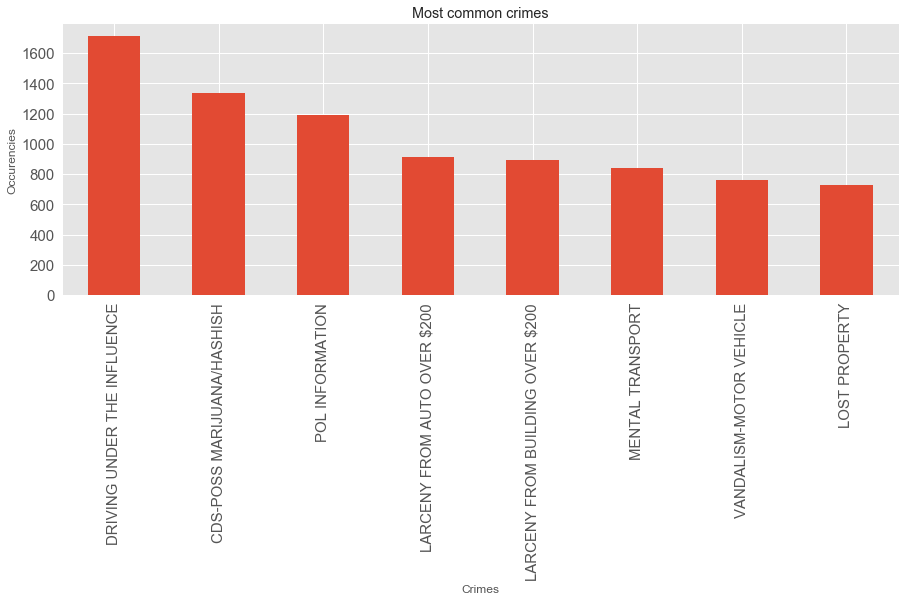

In [15]:
#Plotting the data
get_ipython().magic(u'matplotlib inline')
crimes_cont = classd_column.value_counts()
#matplotlib.style.use('ggplot')
plt.figure(figsize=(15, 5))
plotccrimes = crimes_cont[0:8].plot.bar() #8 biggest values
#labels
plotccrimes.set_xlabel("Crimes")
plotccrimes.set_ylabel("Occurencies")
plotccrimes.set_title("Most common crimes")

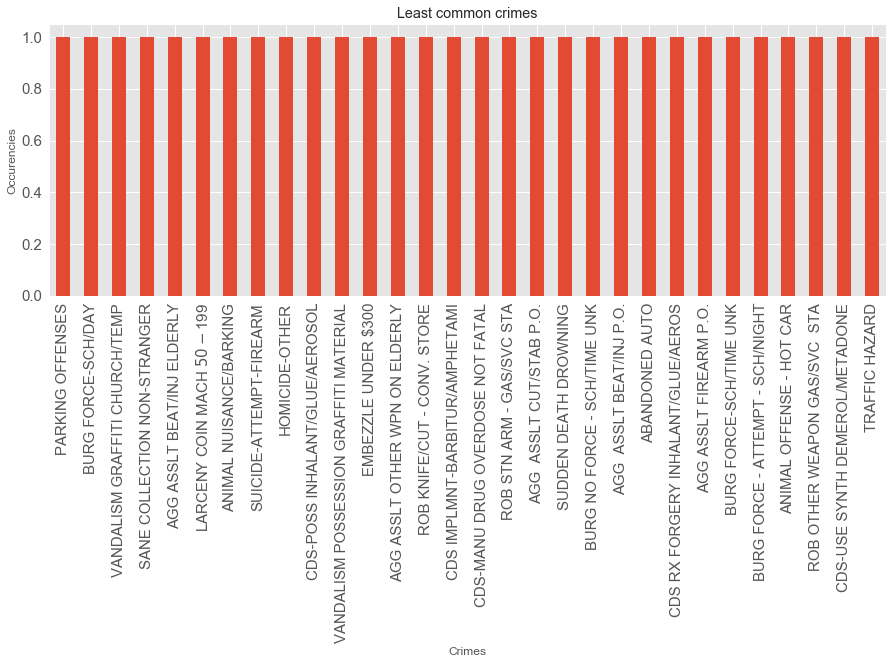

In [16]:
get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')
plt.figure(figsize=(15, 5))
plotlcrimes = crimes_cont[-31:-1].plot.bar() #Last 31 values are 1
#labels
plotlcrimes.set_xlabel("Crimes")
plotlcrimes.set_ylabel("Occurencies")
plotlcrimes.set_title("Least common crimes")

# Separating Violent and Non-violent crimes

In [17]:
#Sellected keywords for class allocation
#str.contains() 
checkviolent = classd_column.str.contains("ASSAULT"or"HOMICIDE"or"ABUSE"or"HARASSMENT"or"SEX"or"CUT"or"ASSLT"or"FORCE")
violent = np.array([]) #violent array
nonviolent = np.array([]) #nonviolent array
for i in range (0,len(checkviolent)): #checking array for keywords
    if checkviolent[i] == True:
        violent = np.append(classd_column[i], violent)
    else:
        nonviolent = np.append(classd_column[i],nonviolent)    

In [18]:
#counting violent and nonviolent occurencies
import collections
violent_count = collections.Counter(violent)
nonviolent_count = collections.Counter(nonviolent)

print(violent_count)
print('Number of violent occurencies: = %d' % len(violent))

Counter({'ASSAULT & BATTERY - CITIZEN': 382, 'SIMPLE ASSAULT - CITIZEN': 311, 'ASSAULT & BATTERY SPOUSE/PARTNER': 290, 'SIMPLE ASSAULT SPOUSE/PARTNER': 111, 'ASSAULT & BATTERY OTHER DOMESTIC': 88, 'SIMPLE ASSAULT OTHER DOMESTIC': 87, 'ASSAULT & BATTERY - POLICE OFFICER': 55, 'SIMPLE ASSAULT - PO': 50, 'SEX OFFENSE - SEX  ASSAULT': 47, 'ASSAULT & BATTERY - ELDERLY': 4, 'SIMPLE ASSAULT - ELDERLY': 2})
Number of violent occurencies: = 1427


In [20]:
#print(nonviolent_count)
print('Number of nonviolent occurencies: = %d' % len(nonviolent))

Number of nonviolent occurencies: = 21942


# 3. Types of Crime

   The Class Description column has the information of different types of crime and the number of its occurencies. After separating the desired information, the set() function was used to allocate only valuable information in the array types_crime, which means only the different types of crime. In total, the database shows the occorencies of 285 different types of crimes.

## 3.1 Common Crimes

   With the column generated with the value_counts() function, the crime occurencies are obtained in the classd_column. The bar plot, making use of the matpltlib library, shows the 8 most common crimes, in which the following can be highlighted:
    - Driving under influence (1710);
    - Posession of marihuana (1334);
    - Not cooperating with police investigation (1191).
    
   A total of 31 crimes occured only one time, such as suicide attempt with firearm, animal offense by keeping it in the car, vandalysm for graffiti material posession and non fatal manual drug overdose. A bar plot shows all the least commum crime occurencies.


## 3.2 Violent and Non-violent Crimes

   In order to separate violent and non-violent crimes, an analysis of the crimes_column array resulted in the establishment of key-words for violent crimes, which are: ASSAULT, HOMICIDE , ABUSE, HARASSMENT, SEX, CUT, ASSLT and FORCE. With the str.constains() function, the classd_column was checked for the keywords. In case any of the selected keyword was found, the value in that position of the array would be allocated in the 'violent' vector. If not, the value would go to the 'nonviolent' array.
   The three most common violent crimes are:
   - Assault and battery to citizen (382);
   - Simple assault to citizen (311);
   - Assault and battery of spouse/partner (290);
   
   The three most common non-violent crimes are the most common overall, which are:
   - Driving under influence (1710);
   - posession of marihuana/hashish (1334);
   - Not cooperating with police investigation (1191).
   
Non-violent crimes represent 93,89% of the crime occurencies, with a total of 21942. Violent crimes, had a total of only 1427 occurencies. The three most commum crimes, which are all non-violent, account for 18.12% of the total crimes, while the 3 most current violent crimes accounted for only 4.2%.
